In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
from pykrx import stock
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

c:\Users\lunar\anaconda3\envs\project\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


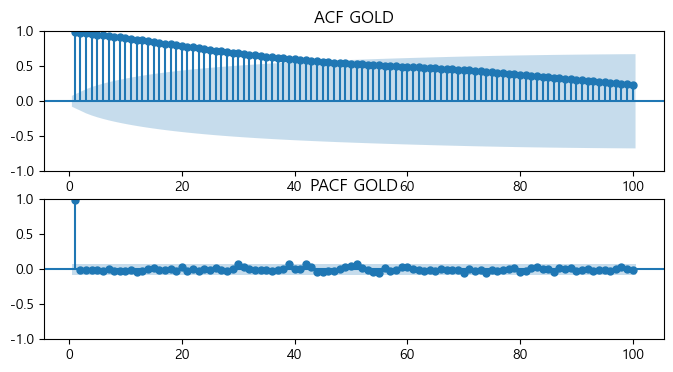

In [70]:
# ACF, PACF TEST
import statsmodels.graphics.tsaplots as sgt

gold = pd.read_csv('USGOLD.csv')
gold.index = [k for k in range(len(gold.index))]
gold_price = np.log(np.array(gold['종가']))

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sgt.plot_acf(gold_price, lags=100, zero=False, ax=ax1)
ax1.set_title('ACF GOLD')

sgt.plot_pacf(gold_price, lags=100, zero=False, ax=ax2)
ax2.set_title('PACF GOLD')

plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller

def adf_test(array):
    result = adfuller(array)
    print('ADF Statistics: %f'%result[0])
    print('p-value: %f'%result[1])
    print('Critical values')
    for key, value in result[4].items():
        print('\t%s: %.3f'%(key, value))


adf_test(gold['종가'])
print('----------------------')

ADF Statistics: -0.348902
p-value: 0.918287
Critical values
	1%: -3.441
	5%: -2.866
	10%: -2.569
----------------------


In [72]:
def local_normalization(array, size=82):
    data = []
    iteration = len(array) - size + 1
    for i in range(0,iteration):
        tmp = array[i:size+i-1]
        mean = np.mean(tmp)
        sd = np.std(tmp)
        data.append((array[size+i-1]-mean)/sd)
    return np.array(data)

c:\Users\lunar\anaconda3\envs\project\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


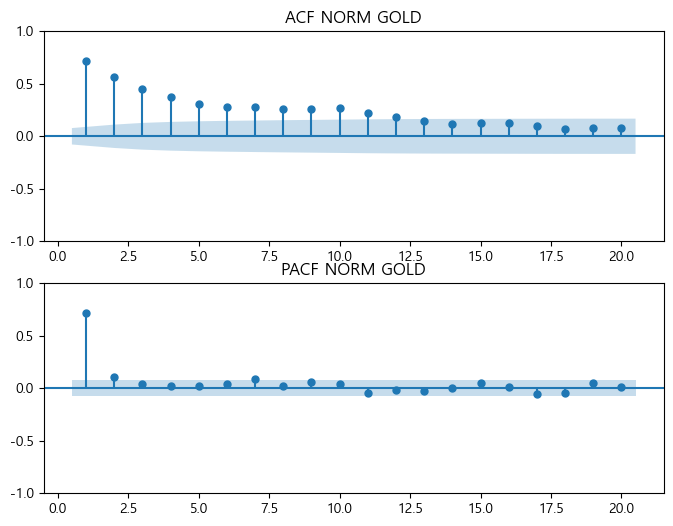

In [73]:
norm_gold = local_normalization(np.array(gold['종가']), 10)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sgt.plot_acf(norm_gold, lags=20, zero=False, ax=ax1)
ax1.set_title('ACF NORM GOLD')

sgt.plot_pacf(norm_gold, lags=20, zero=False, ax=ax2)
ax2.set_title('PACF NORM GOLD')

plt.show()

Text(0.5, 1.0, 'SD')

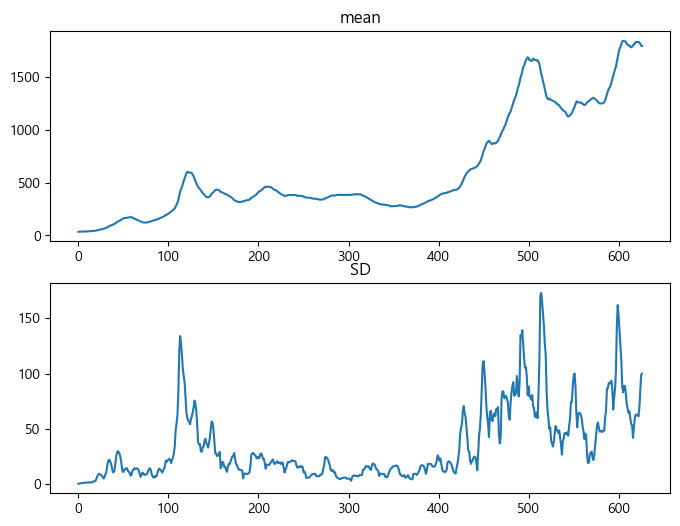

In [74]:
def mean_sd(array, size=82):
    m = []
    s = []
    iteration = len(array) - size + 1
    for i in range(iteration):
        tmp = array[i:size+i]
        mean = np.mean(tmp)
        sd = np.std(tmp)
        m.append(mean)
        s.append(sd)

    return np.array([np.array(m), np.array(s)])


fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(mean_sd(np.array(gold['종가']), 10)[0])
plt.title('mean')

plt.subplot(2,1,2)
plt.plot(mean_sd(np.array(gold['종가']), 10)[1])
plt.title('SD')

636 627


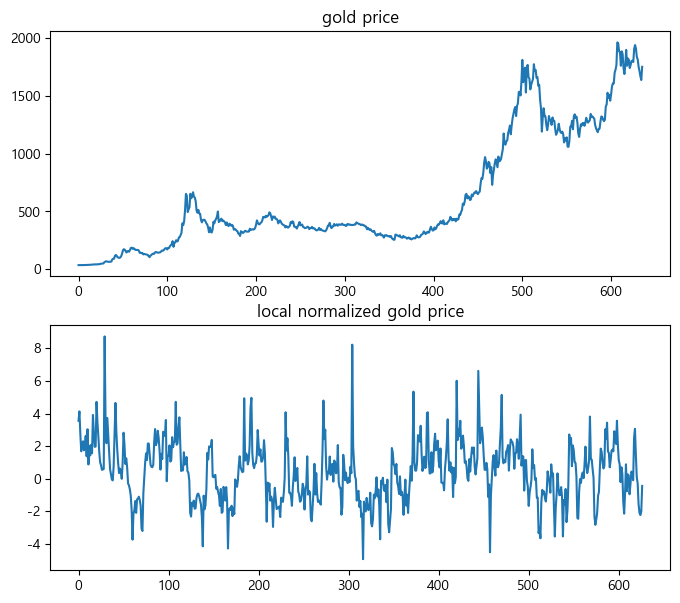

In [75]:
fig = plt.figure(figsize=(8,7))

plt.subplot(2,1,1)
plt.plot(gold['종가'])
plt.title('gold price')

plt.subplot(2,1,2)
plt.plot(norm_gold)
plt.title('local normalized gold price')

print(len(gold), len(norm_gold))

In [76]:
colm = ['A','B','C','D','E','F','G','H','I','J','K']
m = pd.read_csv('macro.csv')
macro = m[colm]

norm_macro = []
for i in range(len(colm)):
    norm_macro.append(local_normalization(macro[colm[i]],size=10))

norm_macro = pd.DataFrame(norm_macro).T
norm_macro.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.075820,1.532383,-1.723489,-1.308278,1.870198,-0.060406,2.969569e-02,1.025153,-2.800810,-1.655265,1.997375
1,-1.147371,1.917628,-1.043893,-1.139544,2.415839,0.703302,5.707011e-01,0.000000,-2.677312,-1.170680,2.444562
2,-0.456182,2.384588,-0.201892,-0.733285,2.911177,1.616008,9.847319e-01,-1.988893,-0.612791,-0.728777,1.876936
3,0.084770,2.445328,0.625552,-0.106676,1.615781,2.216681,4.373383e-15,-1.172604,-0.658005,-0.249571,2.068312
4,-0.102535,2.461276,0.115653,5.171145,1.872560,2.676434,-4.940530e+00,-0.668153,-1.133726,0.367565,1.978627


In [77]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

colm = ['A','B','C','D','E','F','G','H','I','J','K']
def date_range(start, end):
    start = datetime.strptime(start, '%Y-%m')
    end = datetime.strptime(end, '%Y-%m')
    diff = (end.year - start.year) * 12 + end.month - start.month
    dates = [(start + relativedelta(months=i)).strftime("%Y-%m") for i in range(diff+1)]
    return dates

dates = date_range('1988-02', '2022-11')

data = pd.concat([norm_macro, pd.DataFrame(norm_gold[209:])], axis=1)
print(len(data.index), len(dates))

colm.append('label')
data.index = dates
data.columns = np.array(colm)

418 418


In [78]:
train_set, test_set = data.iloc[:350], data.iloc[350:]

test_set.head()

,A,B,C,D,E,F,G,H,I,J,K,label
2017-04,0.561637,2.332601,0.629411,0.081111,2.085192,1.056506,0.030633,-2.841765,0.702169,1.426199,1.717974,0.204867
2017-05,0.314703,1.877809,0.459793,0.534522,1.189330,1.701381,-0.490102,-1.943331,-0.010679,1.279772,1.404722,0.383737
2017-06,-0.705106,1.629784,-0.089253,3.837613,1.259079,1.918768,-1.792843,-0.241236,-1.372779,1.266015,1.615309,0.034908
2017-07,-0.981727,1.156247,0.189165,3.032947,1.461330,0.544559,-1.053129,0.177443,-0.715529,1.390388,1.527752,0.867810
2017-08,-2.065169,1.482827,-1.122944,0.490290,1.779242,0.753700,-1.689886,-0.107833,0.288011,1.810141,1.708028,1.967759


In [79]:
import tensorflow as tf

input1 = tf.keras.layers.Input(shape=(22,1,12))
input2 = tf.keras.layers.Input(shape=(18,5,12))
input3 = tf.keras.layers.Input(shape=(13,10,12))


model1 = tf.keras.Sequential([
    input1,
    tf.keras.layers.Conv2D(12,(1,1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((22,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(22, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=False), merge_mode='concat'),
    tf.keras.layers.Flatten()
])

model2 = tf.keras.Sequential([
    input2,
    tf.keras.layers.Conv2D(12,(1,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((18,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(22, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=False), merge_mode='concat'),
    tf.keras.layers.Flatten()
])

model3 = tf.keras.Sequential([
    input3,
    tf.keras.layers.Conv2D(12,(1,10), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((13,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(22, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=False), merge_mode='concat'),
    tf.keras.layers.Flatten()
])

merged = tf.keras.layers.concatenate([model1.output, model2.output, model3.output])
output = tf.keras.layers.Dense(100)(merged)
output = tf.keras.layers.Dense(50)(output)
output = tf.keras.layers.Dense(25)(output)
output = tf.keras.layers.Dense(1)(output)

model = tf.keras.Model(inputs=[input1, input2, input3], outputs=[output])

model.summary()
model.compile('adam', loss='MeanSquaredError', metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 22, 1, 12)]  0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 18, 5, 12)]  0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 13, 10, 12)] 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 22, 1, 12)    156         input_16[0][0]                   
____________________________________________________________________________________________

In [80]:
def gen_train_xy1(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(22):
            tmp.append(np.array(df.iloc[i+k]).tolist())
        train_x.append(tmp)
    
    train_y = np.array(df['label'][21:])
    return np.array(train_x).reshape(-1,22,1,12), train_y

X1, Y = gen_train_xy1(train_set)
test_x1, test_y = gen_train_xy1(test_set)

def gen_train_xy2(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(18):
            tmp.append(np.array(df.iloc[i+k:i+k+5]).tolist())
        train_x.append(tmp)
    
    return np.array(train_x).reshape(-1,18,5,12)

def gen_train_xy3(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(13):
            tmp.append(np.array(df.iloc[i+k:i+k+10]).tolist())
        train_x.append(tmp)
    
    return np.array(train_x).reshape(-1,13,10,12)


X2 = gen_train_xy2(train_set)
X3 = gen_train_xy3(train_set)

test_x2 = gen_train_xy2(test_set)
test_x3 = gen_train_xy3(test_set)

In [81]:
model.fit((X1, X2, X3), Y, batch_size=5, epochs=200, validation_data=((test_x1, test_x2, test_x3), test_y))

Epoch 1/200
66/66 [==============================] - 3s 52ms/step - loss: 2.4505 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
66/66 [==============================] - 1s 18ms/step - loss: 1.6230 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
66/66 [==============================] - 1s 18ms/step - loss: 1.1137 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
66/66 [==============================] - 1s 18ms/step - loss: 0.7957 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
66/66 [==============================] - 1s 17ms/step - loss: 0.6653 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
66/66 [==============================] - 1s 17ms/step - loss: 0.4478 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
66/66 [==============================] - 1s 18ms/step - loss: 0.3768 - accuracy: 0.0000e+00 - val_loss: na

In [82]:
ta = model.predict((test_x1, test_x2, test_x3))

In [83]:
ba = model.predict((X1, X2, X3))

In [84]:
test_df = pd.DataFrame({
    'predict':np.squeeze(ta, axis=1),
    'real':test_y
})

<AxesSubplot:>

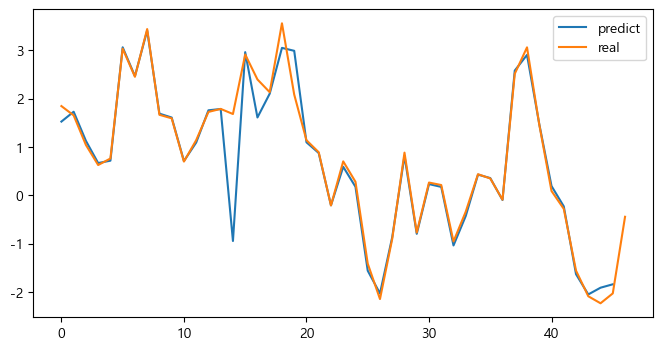

In [85]:
test_df.plot(figsize=(8,4))

<AxesSubplot:>

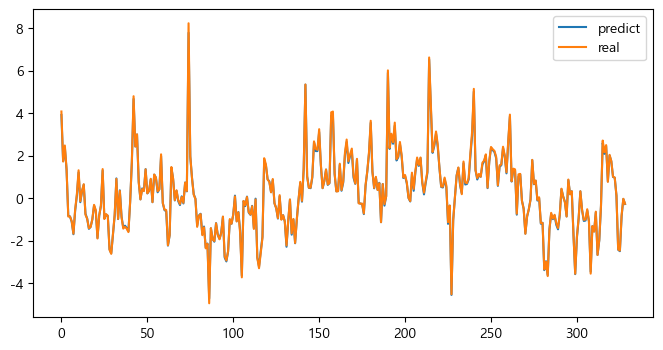

In [86]:
train_df = pd.DataFrame({
    'predict':np.squeeze(ba, axis=1),
    'real':Y
})

train_df.plot(figsize=(8,4))